In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#    1. Data Import and Data Exploration

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read_data**

In [148]:
df_date = pd.read_csv('C:\\Users\\KBINM20373\\Documents\\resume projects\\input-files-1\\Input Files\\dim_date.csv')
df_hotels = pd.read_csv('C:\\Users\\KBINM20373\\Documents\\resume projects\\input-files-1\\Input Files\\dim_hotels.csv')
df_rooms = pd.read_csv('C:\\Users\\KBINM20373\\Documents\\resume projects\\input-files-1\\Input Files\\dim_rooms.csv')
df_agg_bookings = pd.read_csv('C:\\Users\\KBINM20373\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\fact_aggregated_bookings.csv')
df_bookings = pd.read_csv('C:\\Users\\KBINM20373\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\fact_bookings.csv')


**Explore bookings data**

In [63]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [64]:
df_bookings.shape

(134590, 12)

In [65]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [66]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [12]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

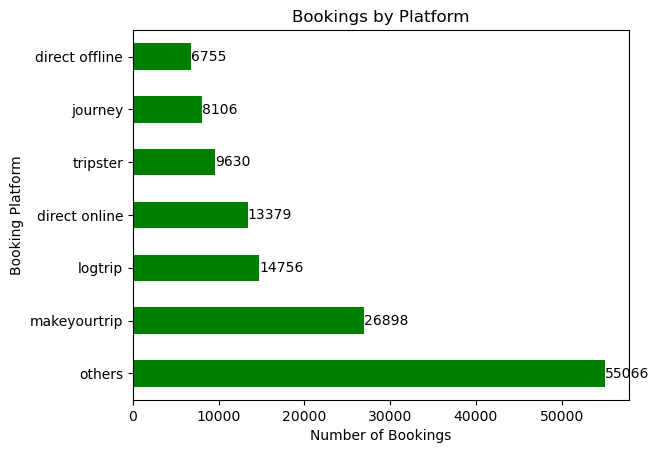

In [67]:
import matplotlib.pyplot as plt


value_counts = df_bookings['booking_platform'].value_counts()
ax = value_counts.plot(kind='barh', color='green')


for i, count in enumerate(value_counts):
    ax.text(count, i, str(count), ha='left', va='center')  # Adjusted the coordinates and alignment


plt.xlabel('Number of Bookings')
plt.ylabel('Booking Platform')
plt.title('Bookings by Platform')

plt.show()


In [68]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read data**

In [20]:
df_hotels = pd.read_csv('C:\\Users\\KBINM20373\\Documents\\resume projects\\input-files-1\\Input Files\\dim_hotels.csv')

In [22]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [23]:
df_hotels.shape

(25, 4)

In [24]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [27]:
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

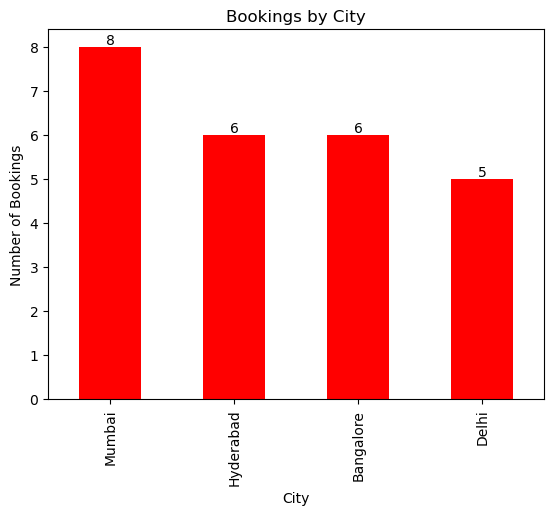

In [42]:

value_counts = df_hotels['city'].value_counts()

ax = value_counts.plot(kind='bar', color='red')

for i, count in enumerate(value_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')


plt.xlabel('City')
plt.ylabel('Number of Bookings')
plt.title('Bookings by City')

# Show the plot
plt.show()


In [30]:
#Explore df_agg_bookings data
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [52]:
df_agg_bookings.shape

(9200, 5)

In [53]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [54]:
#Find out unique property ids in aggregate bookings dataset
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [55]:
#Find out total bookings per property_id
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [56]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [59]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [69]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [77]:
df_bookings=df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [78]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [84]:
avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [80]:
df_bookings.revenue_generated.describe()

count    1.345780e+05
mean     1.537804e+04
std      9.304015e+04
min      6.500000e+03
25%      9.900000e+03
50%      1.350000e+04
75%      1.800000e+04
max      2.856000e+07
Name: revenue_generated, dtype: float64

In [85]:
higher_limit=avg+3*std
higher_limit

294498.50173198653

In [87]:
lower_limit=avg-3*std
lower_limit             # revenue generated can't be in negative

-263742.4278566132

In [88]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [89]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [90]:
avg_,std_=df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()
avg_,std_

(12695.983585117372, 6927.791692242509)

In [91]:
higher_limit=avg_+3*std_
higher_limit

33479.3586618449

In [96]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [98]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [100]:
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [101]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

In [153]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
Occ Pct                0
dtype: int64

In [107]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [109]:
df_agg_bookings.capacity.mean(),df_agg_bookings.capacity.median()

(25.280495759947815, 25.0)

In [117]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace=True)

In [123]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


**In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [126]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [149]:
df_agg_bookings.shape

(9200, 5)

In [150]:
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]

***
### ==> 3. Data Transformation
***

In [151]:
# used lambda function here
df_agg_bookings["Occ Pct"]=df_agg_bookings.successful_bookings/df_agg_bookings.capacity
df_agg_bookings["Occ Pct"]=df_agg_bookings["Occ Pct"].apply(lambda x: round(x*100,2))
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ Pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [154]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ Pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [157]:
df_agg_bookings.groupby("room_category")['Occ Pct'].mean().round(2)

room_category
RT1    57.88
RT2    58.01
RT3    58.03
RT4    59.28
Name: Occ Pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [158]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [161]:
df=pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ Pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
...,...,...,...,...,...,...,...,...
9187,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9188,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9189,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9190,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [163]:
df.groupby("room_class")["Occ Pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.88
Name: Occ Pct, dtype: float64

In [164]:
df.drop("room_id",axis=1,inplace=True)

In [165]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ Pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard
...,...,...,...,...,...,...,...
9187,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9188,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9189,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9190,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


**2. Print average occupancy rate per city**

In [171]:
df=pd.merge(df,df_hotels,on='property_id',how ='inner')

In [174]:
df.groupby('city')["Occ Pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.902319
Name: Occ Pct, dtype: float64

<Axes: xlabel='city'>

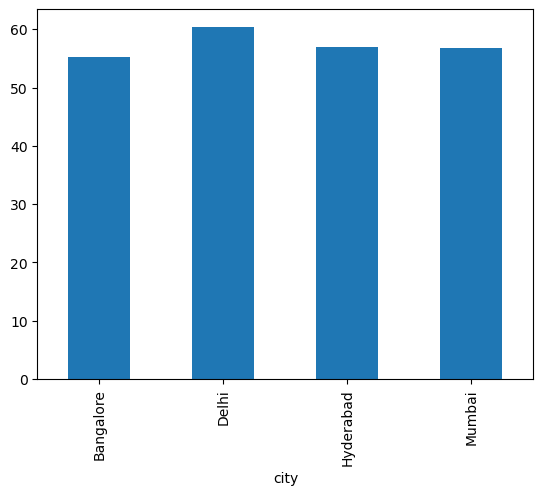

In [180]:
df.groupby('city')["Occ Pct"].mean().plot(kind='bar')

**3. When was the occupancy better? Weekday or Weekend?**

In [175]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [177]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')

In [181]:
df.groupby("day_type")["Occ Pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: Occ Pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [198]:
df_jun22=df[df["mmm yy"]=='Jun 22']

In [199]:
df.groupby('city')["Occ Pct"].mean().round(2)

city
Bangalore    55.18
Delhi        60.40
Hyderabad    56.90
Mumbai       56.78
Name: Occ Pct, dtype: float64

<Axes: xlabel='city'>

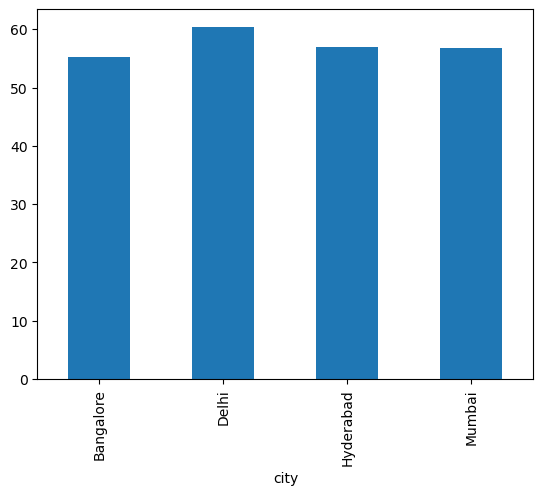

In [201]:
df.groupby('city')["Occ Pct"].mean().round(2).plot(kind='bar')

 **5.We got new data for the month of august. Append that to existing data**

In [203]:
df_august=pd.read_csv('C:\\Users\\KBINM20373\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\new_data_august.csv')

In [204]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ Pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,17562,31-Jul-22,RT2,12,30.0,40.00,Elite,Atliq Bay,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,17562,31-Jul-22,RT3,14,27.0,51.85,Premium,Atliq Bay,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,17562,31-Jul-22,RT4,2,6.0,33.33,Presidential,Atliq Bay,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [ ]:
pd.concat()